# Heart Disease Predictor

## Enunciado del Problema
El problema que abordaremos es el desarrollo de un modelo predictivo capaz de determinar el riesgo de enfermedades cardiovasculares en individuos. Utilizaremos variables como la edad, género, presión arterial, y otras medidas clínicas para predecir si un individuo tiene un alto riesgo de desarrollar este tipo de enfermedades.

## Objetivos del Proyecto
Realizar un análisis exploratorio completo de los datos para entender las distribuciones, correlaciones y posibles anomalías en las variables.
Preparar los datos para el modelado mediante la limpieza, normalización y codificación de las variables necesarias.
Seleccionar la métrica de evaluación adecuada para medir la efectividad de los modelos de machine learning, considerando la precisión, sensibilidad, especificidad y el área bajo la curva ROC como posibles candidatos.
Comparar diferentes modelos de machine learning para identificar el más adecuado en términos de precisión y robustez. Experimentaremos con al menos tres modelos diferentes: regresión logística, random forest y XGBoost.
Comunicar efectivamente los resultados obtenidos a través de visualizaciones y un informe detallado que documente todo el proceso y las conclusiones.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from matplotlib.ticker import MaxNLocator
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np


C:\Users\CMG\AppData\Local\Temp\ipykernel_280104\1163926289.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Análisis Exploratorio de Datos (EDA)
Vamos a cargar el dataset y empezar con el EDA, explorando las primeras filas del dataset, estadísticas descriptivas y visualizaciones de las distribuciones de las variables.

In [5]:
# Cargar los datos
data = pd.read_csv("./datos/CVD_cleaned.csv")

# Mostrar las primeras filas del dataset
print(data.head())

# Estadísticas descriptivas
print(data.describe())



  General_Health                  Checkup Exercise Heart_Disease Skin_Cancer  \
0           Poor  Within the past 2 years       No            No          No   
1      Very Good     Within the past year       No           Yes          No   
2      Very Good     Within the past year      Yes            No          No   
3           Poor     Within the past year      Yes           Yes          No   
4           Good     Within the past year       No            No          No   

  Other_Cancer Depression Diabetes Arthritis     Sex Age_Category  \
0           No         No       No       Yes  Female        70-74   
1           No         No      Yes        No  Female        70-74   
2           No         No      Yes        No  Female        60-64   
3           No         No      Yes        No    Male        75-79   
4           No         No       No        No    Male          80+   

   Height_(cm)  Weight_(kg)    BMI Smoking_History  Alcohol_Consumption  \
0        150.0        32.66  

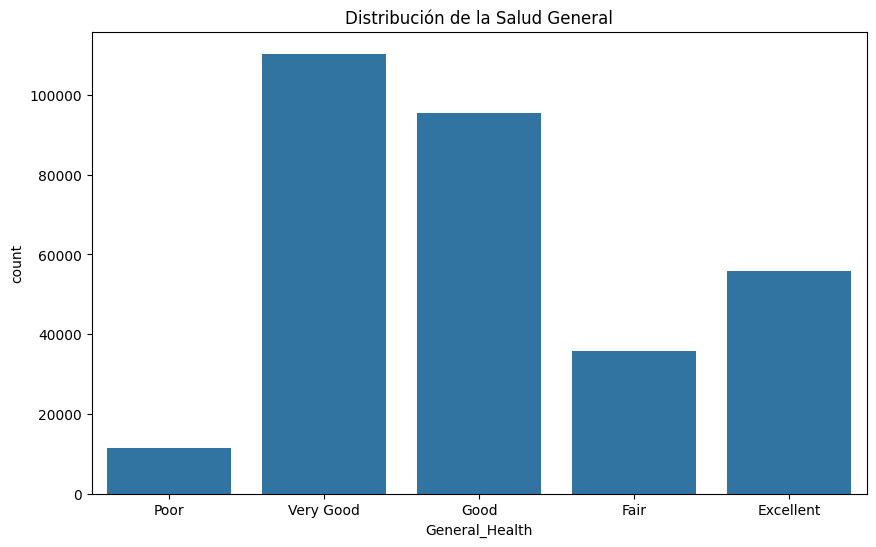

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(x='General_Health', data=data)
plt.title('Distribución de la Salud General')
plt.show()

### Análisis de Componentes Principales para Variables Numéricas

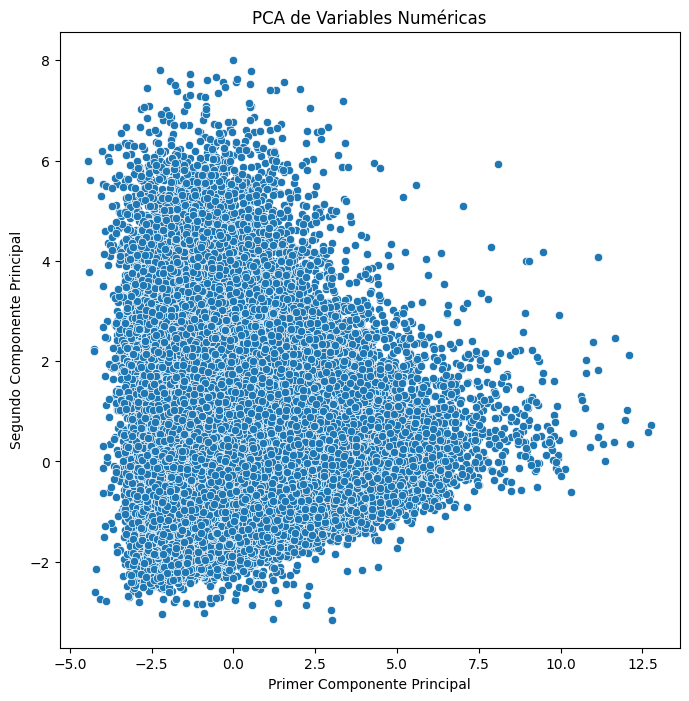

In [7]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Verificar si el DataFrame está vacío
if data.empty:
    raise ValueError("El DataFrame está vacío. Comprueba la ruta del archivo CSV y asegúrate de que no esté vacío.")

# Filtrar solo las columnas numéricas
numeric_cols = data.select_dtypes(include=[np.number]).columns
numeric_data = data[numeric_cols]

# Verificar si hay columnas numéricas seleccionadas
if numeric_data.empty:
    raise ValueError("No se encontraron columnas numéricas")

# Comprobar si hay valores NaN y cuántos hay
if numeric_data.isnull().any().any():
    print("Hay valores NaN en los datos, se procederá a imputarlos.")
    print(numeric_data.isnull().sum())

# Imputar valores NaN con la mediana
imputer = SimpleImputer(strategy='median')
numeric_data_imputed = imputer.fit_transform(numeric_data)

# Estandarizar los datos imputados
scaler = StandardScaler()
numeric_scaled = scaler.fit_transform(numeric_data_imputed)

# Aplicar PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(numeric_scaled)
# Crear un DataFrame con los componentes principales para visualización
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Visualizar
plt.figure(figsize=(8, 8))
sns.scatterplot(x='PC1', y='PC2', data=pca_df)
plt.title('PCA de Variables Numéricas')
plt.xlabel('Primer Componente Principal')
plt.ylabel('Segundo Componente Principal')
plt.show()

### Análisis Univariado

El análisis univariado se enfoca en entender la distribución de cada variable independientemente. Esto incluye visualizar frecuencias para variables categóricas y distribuciones estadísticas para variables continuas.

In [8]:
# Lista de variables numéricas y categóricas
numeric_vars = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_vars = data.select_dtypes(include=['object']).columns.tolist()


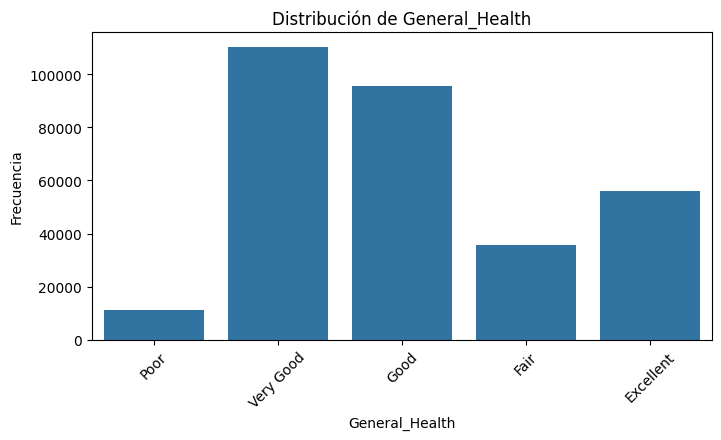

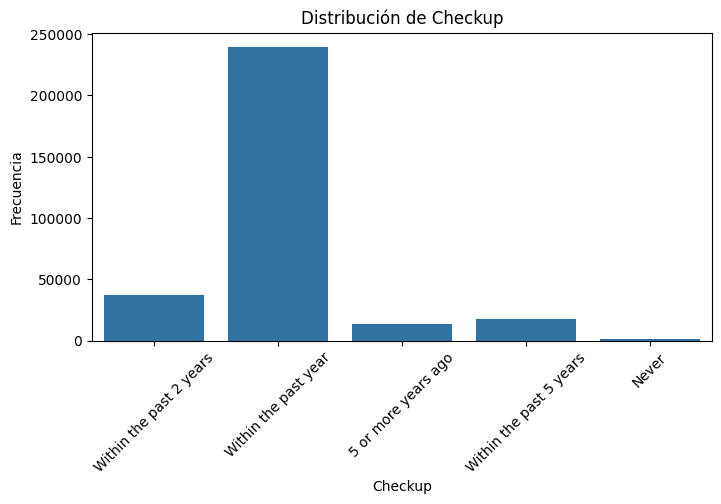

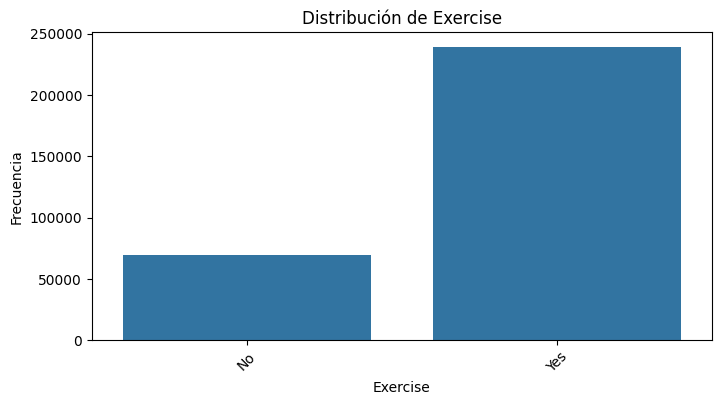

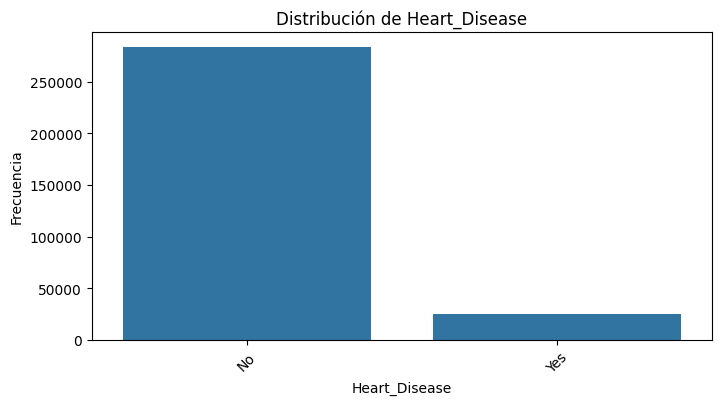

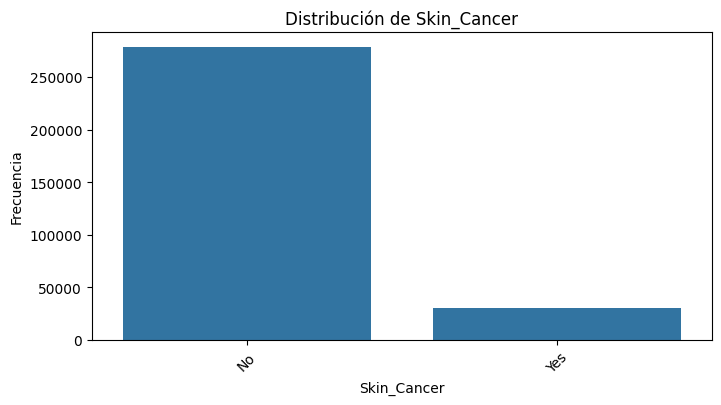

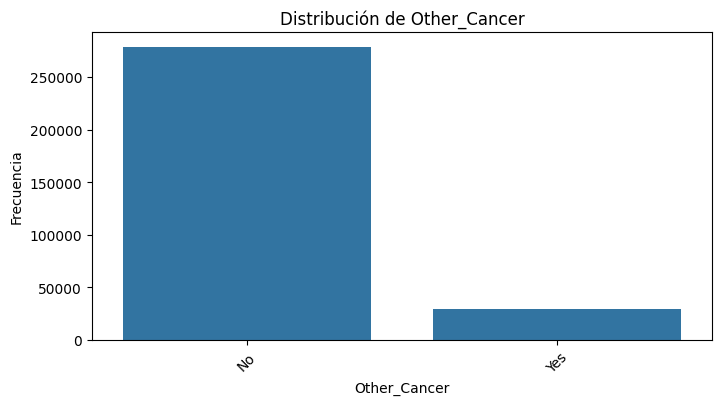

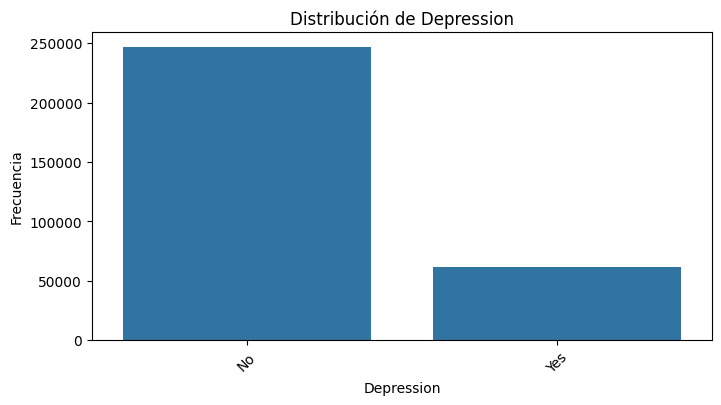

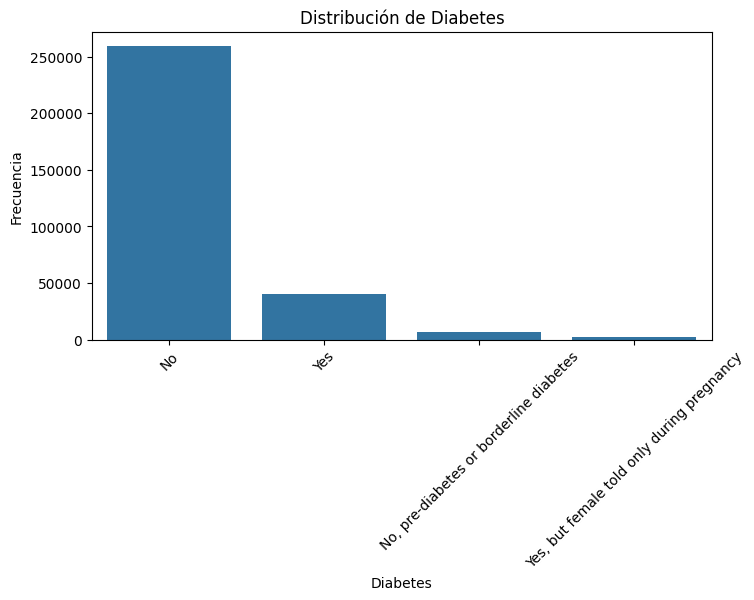

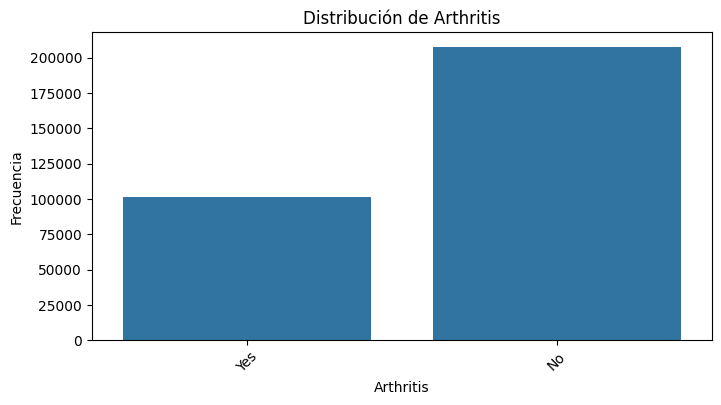

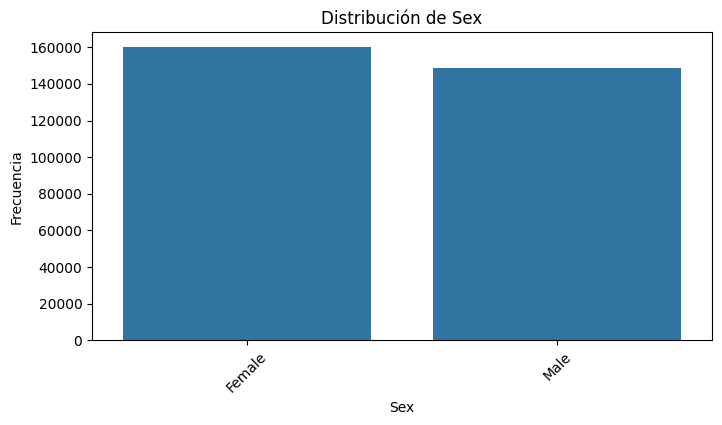

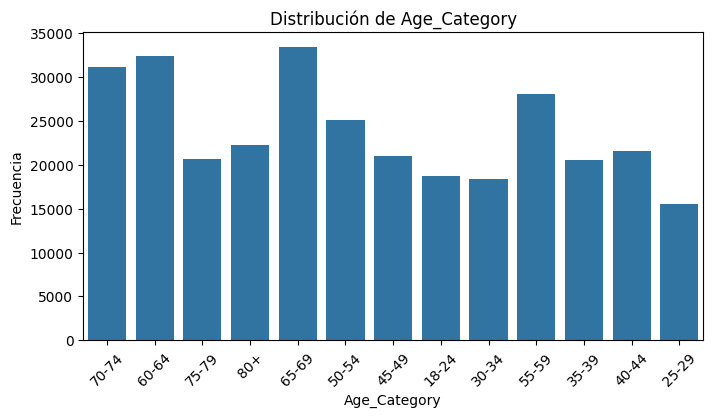

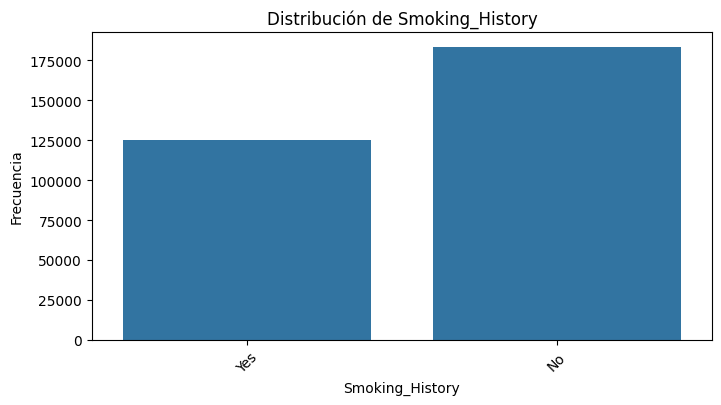

In [9]:

# Análisis univariado para variables categóricas
for var in categorical_vars:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=var, data=data)
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.show()

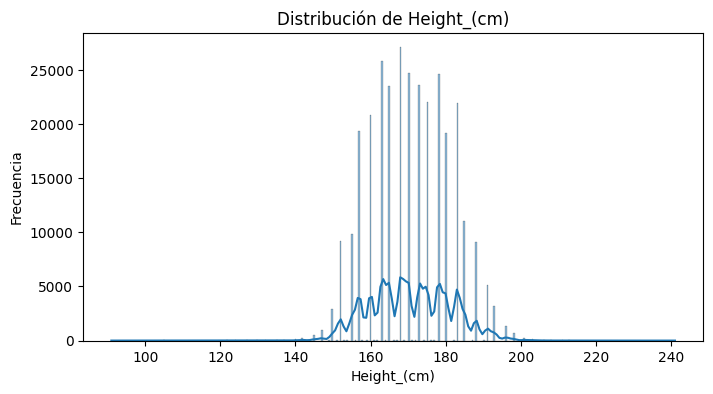

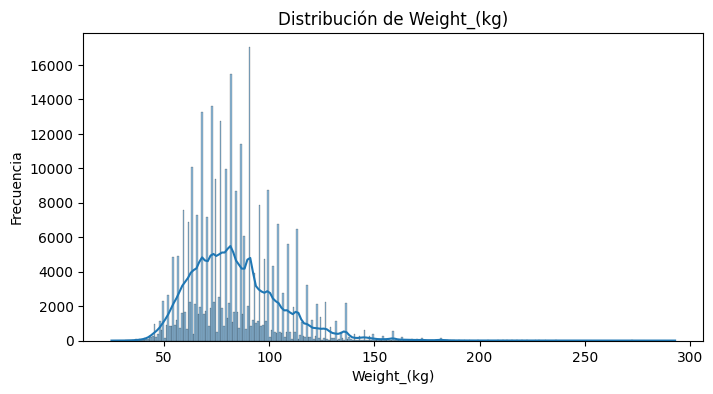

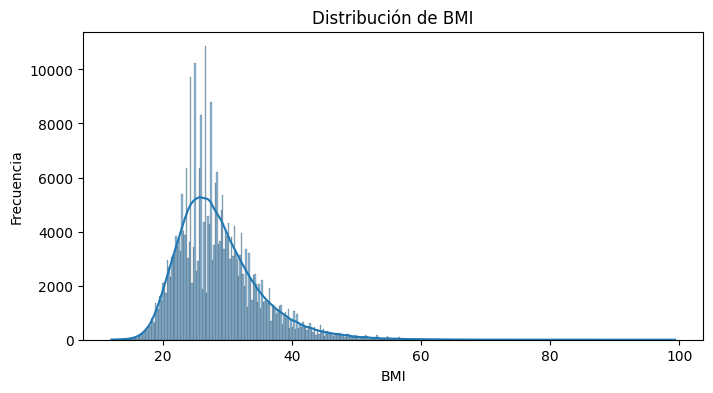

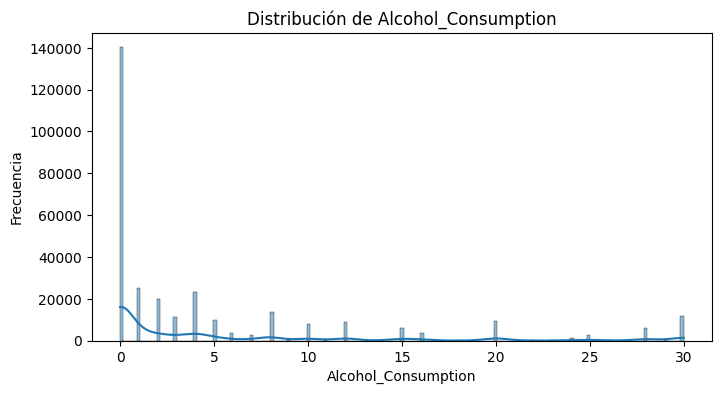

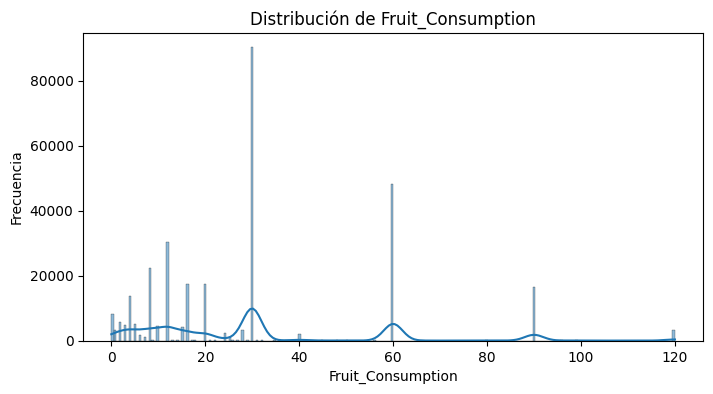

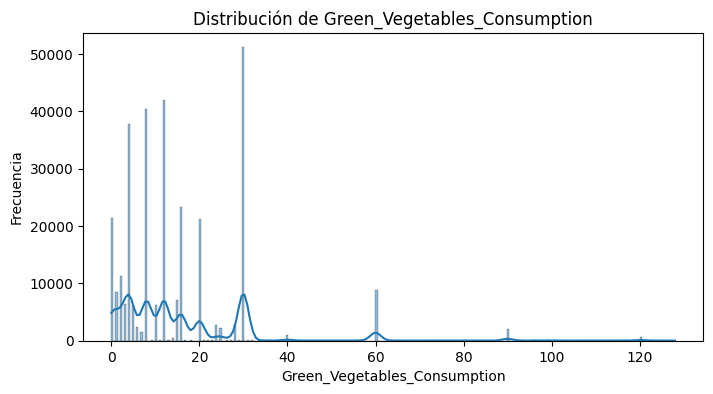

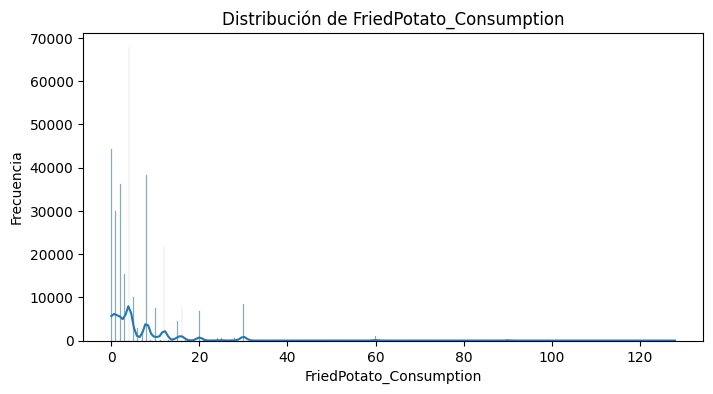

In [11]:
# Análisis univariado para variables numéricas
for var in numeric_vars:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[var], kde=True)
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.show()


### Análisis Bivariado

El análisis bivariado examina la relación entre cada variable independiente y la variable objetivo. Esto puede incluir gráficos de barras para relaciones categóricas y diagramas de dispersión para relaciones continuas.

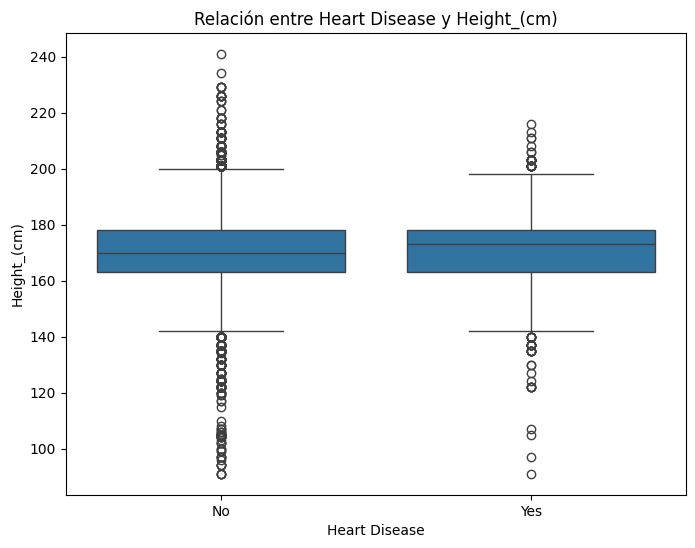

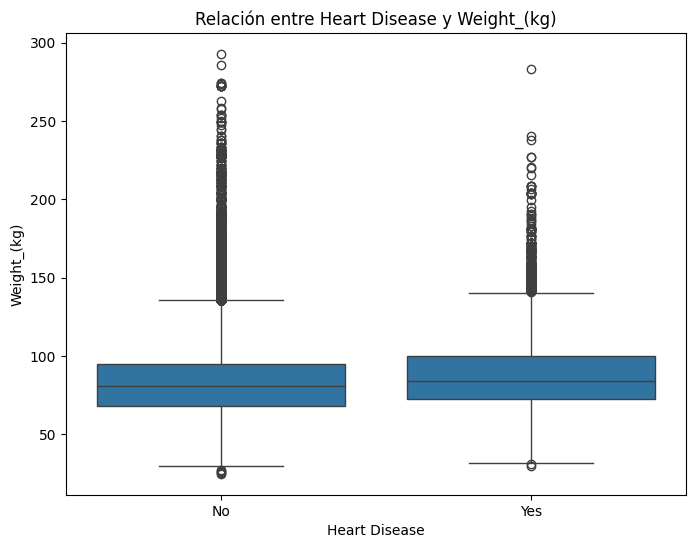

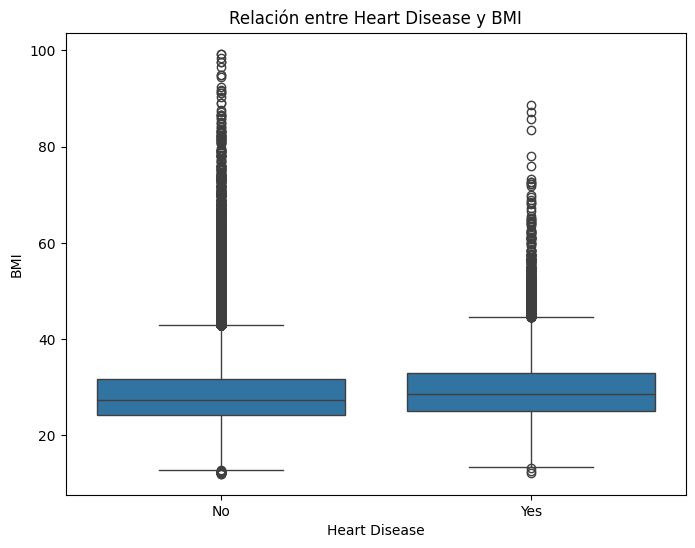

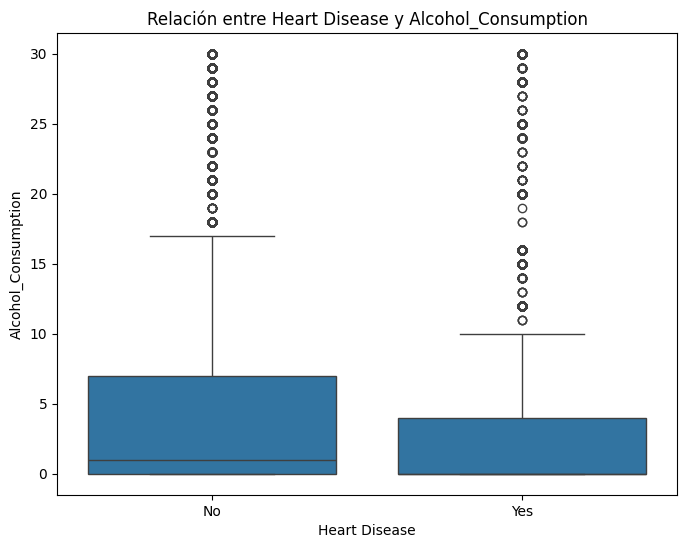

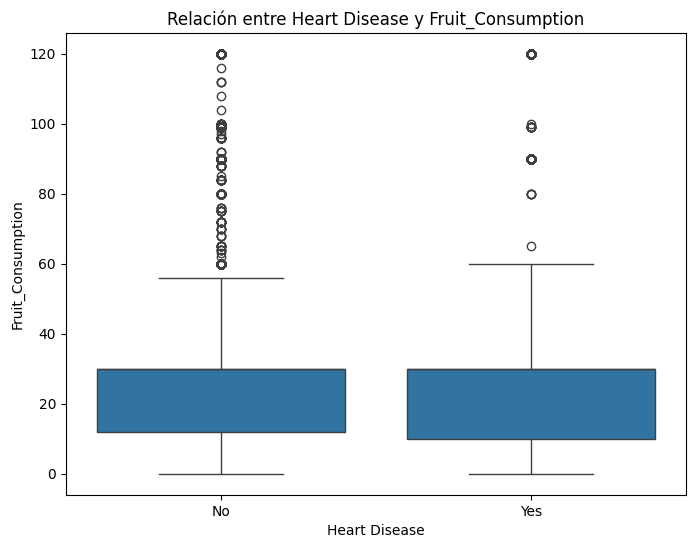

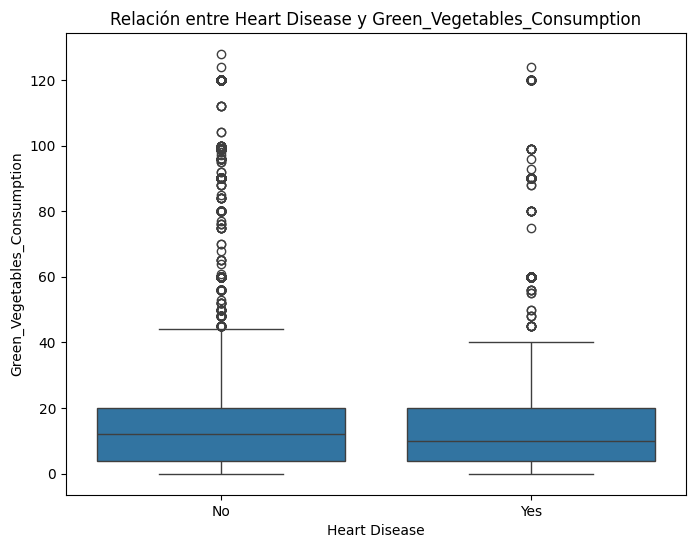

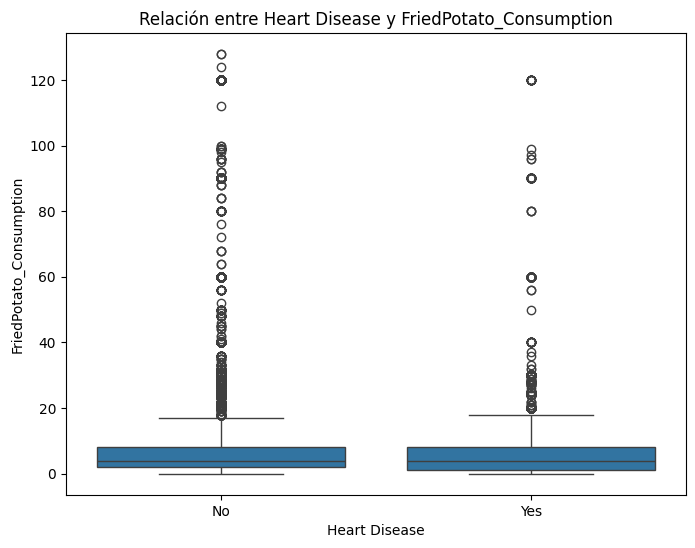

In [12]:
# Análisis bivariado para variables numéricas
for var in numeric_vars:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Heart_Disease', y=var, data=data)
    plt.title(f'Relación entre Heart Disease y {var}')
    plt.xlabel('Heart Disease')
    plt.ylabel(var)
    plt.show()

Analizando el análisis bivariado para variables numéricas podemos sacar ciertas conclusiones.

* Relación entre Heart Disease y Height (cm)
    * Distribución de la altura: Se observa cómo varía la altura de las personas con y sin enfermedad cardíaca. 
    * En cuanto a las medianas (la línea dentro del boxplot) presentan diferencias ligeras estando la mediana del grupo que no presenta ninguna complicación en torno a los 170 cm y en los pacientes que sí presentan enfermedades cardíacas ligeramnete superior. No se cree que esto explique ninguna causalidad de la variable objetivo si no que se puede tratar de un sesgo en los propios datos.
    * Outliers en la altura: Los puntos fuera de las "bigotes" (whiskers) del boxplot indican valores atípicos, lo cual podría sugerir que hay casos extremos en la altura que podrían estar asociados con la enfermedad. En este caso, el mayor número de outliers presentes se encuentran en el grupo que no padecen problemas de corazón.

* Relación entre Heart Disease y Weight (kg)
    * Distribución del peso: se compara el peso de individuos con y sin enfermedad cardíaca. Las cajas o boxes presentes son de un tamaño similar, al igual que la mediana dentro de esta que está en torno a unos ochenta o noventa kilogramos. En cuanto al número de outliers, el grupo que presenta una enfermedad de corazón identifica menos outliers que el que no. Se puede justificar esta diferencia por un sesgo menor en datos.

* Relación entre Heart Disease y BMI
    * Distribución del BMI: El índice de masa corporal (BMI) es un factor importante relacionado con las enfermedades cardíacas. De manera muy similar al caso anterior, tanto el tamaño de los boxes como la posición de la mediana y de los "bigotes" están en rangos muy similares.

* Relación entre Heart Disease y Alcohol_Consumption
    * Consumo de alcohol: Este gráfico podría mostrar si las personas con enfermedad cardíaca tienden a consumir más o menos alcohol que aquellas sin la enfermedad. Si no hay mucha superposición entre los grupos, el consumo de alcohol podría estar asociado con la enfermedad.

* Relación entre Heart Disease y Fruit_Consumption
    * Consumo de frutas: Este análisis podría revelar si existe una relación entre la cantidad de frutas consumidas y la presencia de enfermedades cardíacas, algo que se espera sea un factor de estilo de vida saludable.

* Relación entre Heart Disease y Green_Vegetables_Consumption
    * Consumo de vegetales verdes: Similar al consumo de frutas, este boxplot puede sugerir si el consumo de verduras tiene alguna relación con la salud cardíaca.

* Relación entre Heart Disease y FriedPotato_Consumption
    * Consumo de patatas fritas: Este gráfico podría mostrar la relación entre el consumo de alimentos potencialmente no saludables como las patatas fritas y la enfermedad cardíaca.


Para todas estas gráficas, algunas consideraciones comunes incluyen:

Medianas y cuartiles: La mediana es la línea central en cada caja, y las alturas de las cajas representan los cuartiles (25% y 75% percentiles). Si las medianas están en niveles muy diferentes, eso indica una diferencia central entre los grupos.
Bigotes: Los extremos de los bigotes representan el rango típico de los datos, y los puntos fuera de estos son considerados outliers.
Ancho de las cajas: El ancho de la caja indica la dispersión entre los cuartiles medianos, lo cual puede hablar de la variabilidad de los datos en ese grupo.

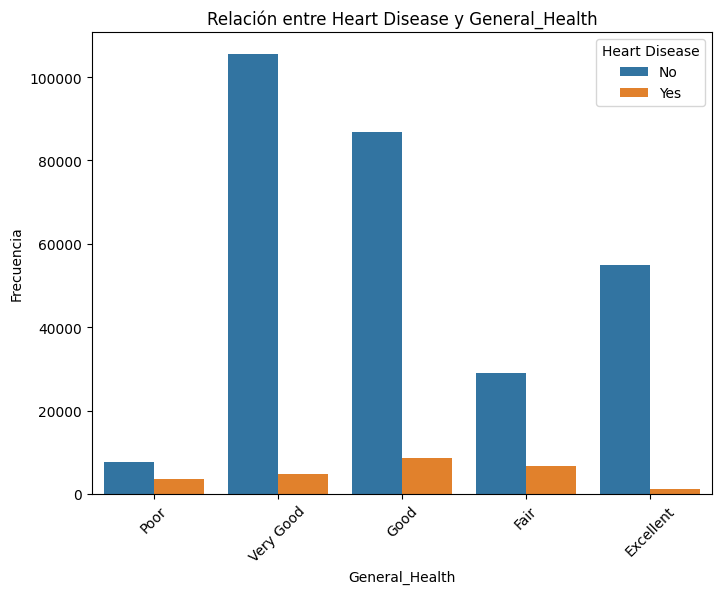

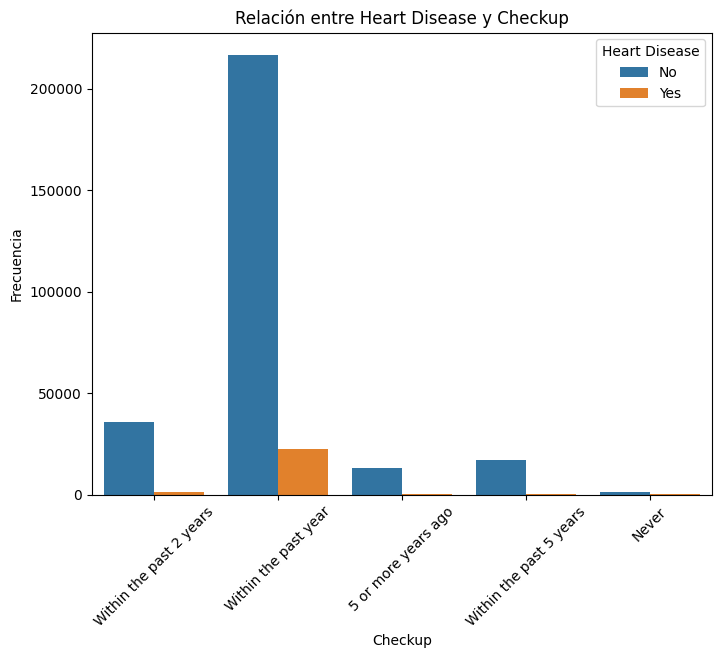

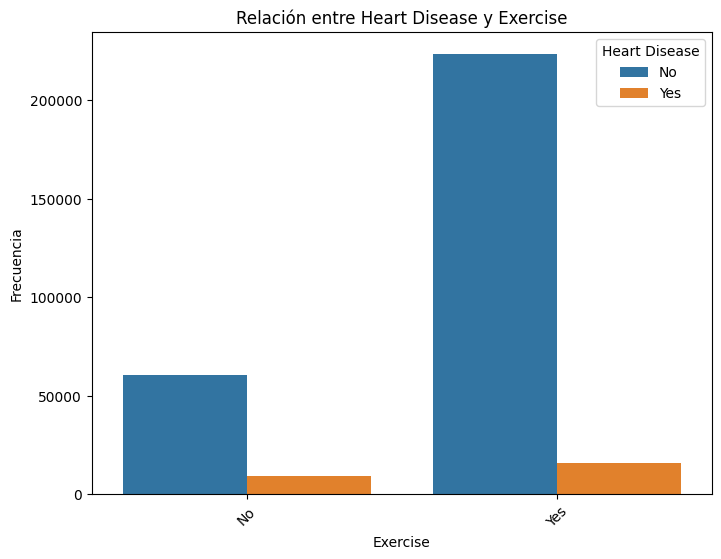

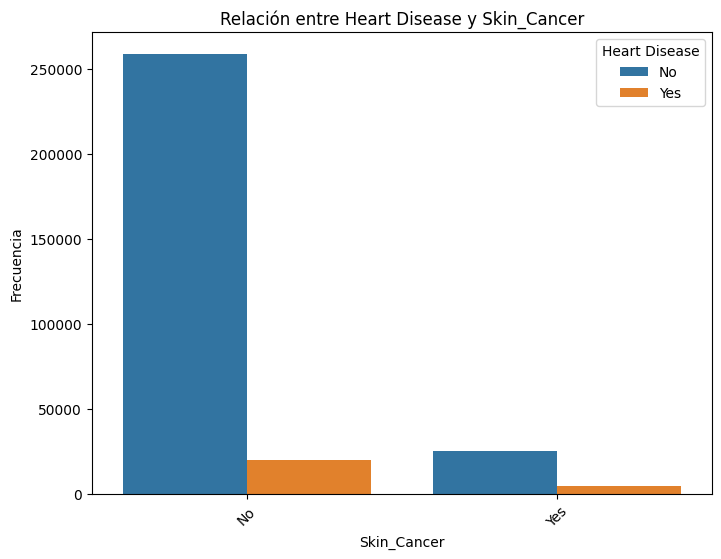

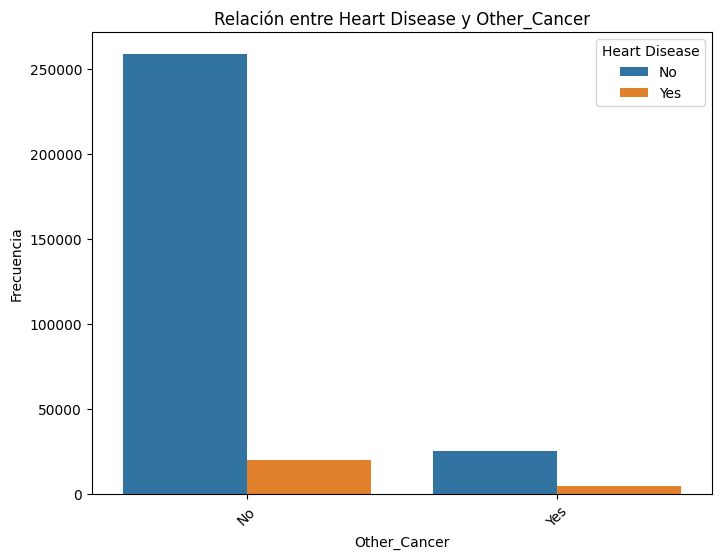

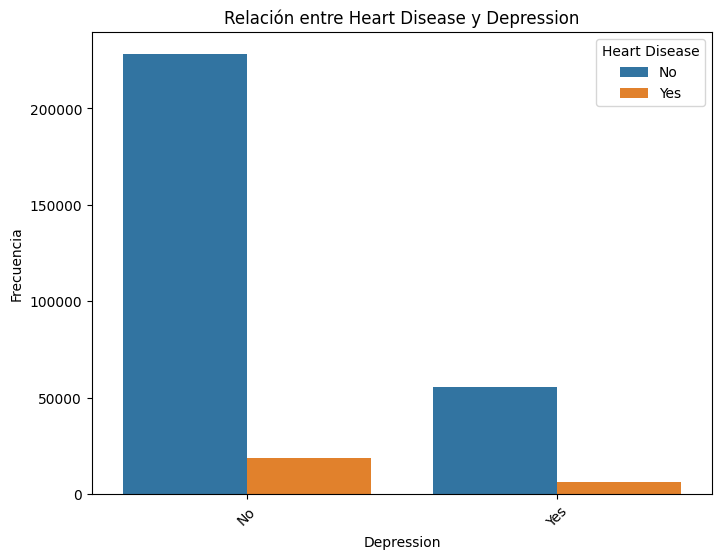

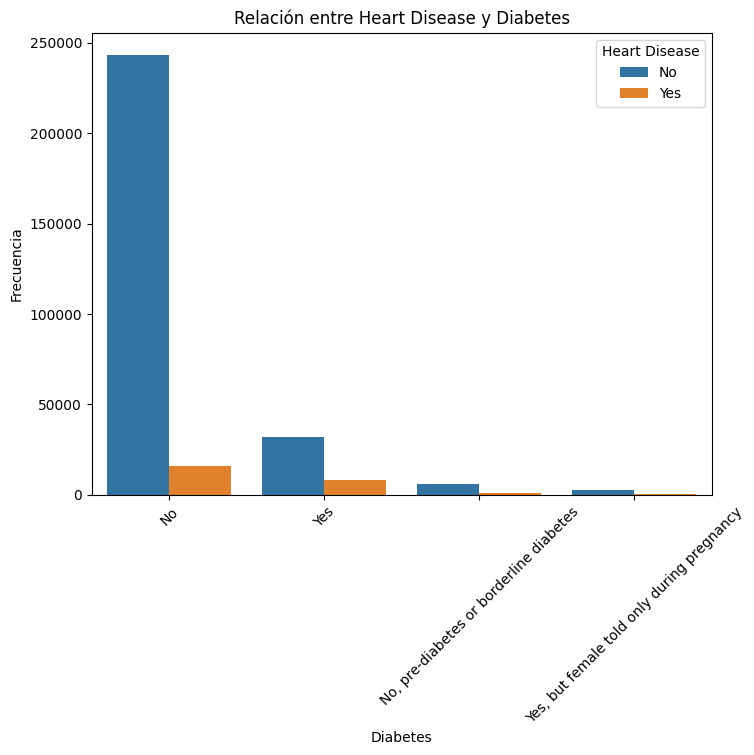

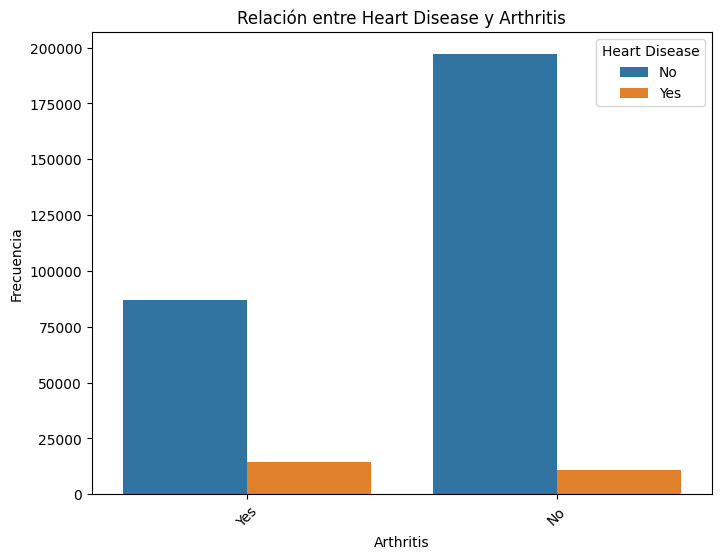

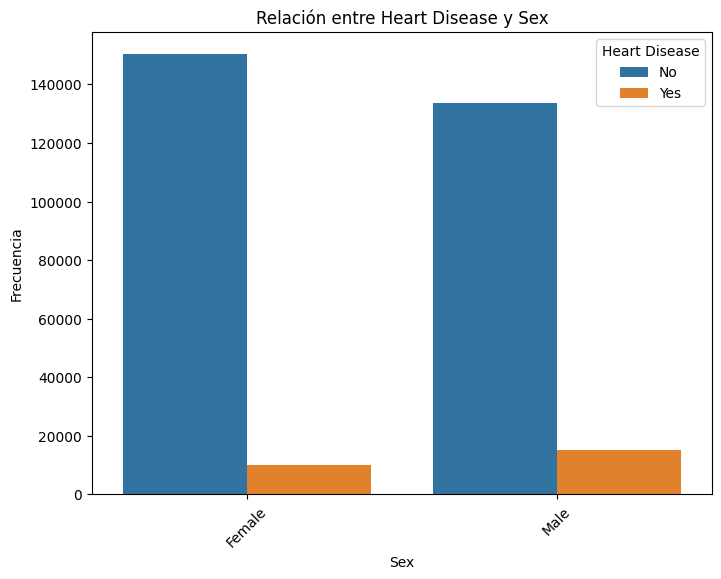

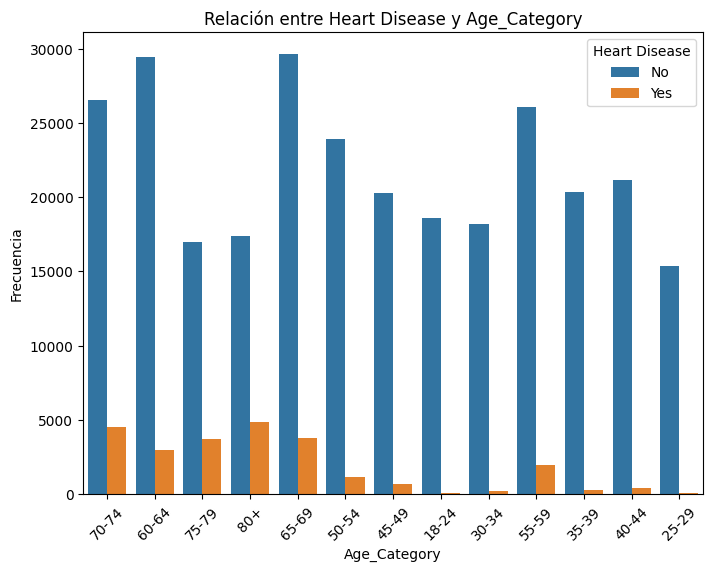

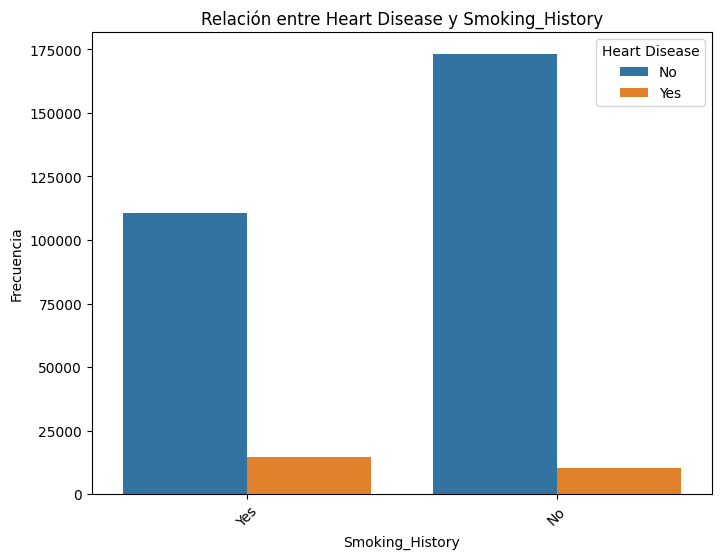

In [13]:
# Análisis bivariado para variables categóricas
for var in categorical_vars:
    if var != 'Heart_Disease':  # Excluimos la variable objetivo
        plt.figure(figsize=(8, 6))
        sns.countplot(x=var, hue='Heart_Disease', data=data)
        plt.title(f'Relación entre Heart Disease y {var}')
        plt.xlabel(var)
        plt.ylabel('Frecuencia')
        plt.xticks(rotation=45)
        plt.legend(title='Heart Disease')
        plt.show()

## Ingeniería de Características
Para la preparación del dataset, abordaremos los siguientes pasos:

Gestión de valores faltantes: Imputaremos o eliminaremos filas/columnas según sea necesario.
Codificación de variables categóricas: Usaremos técnicas como One-Hot Encoding o Label Encoding.
Normalización/Estandarización de variables: Estandarizaremos las variables numéricas para tener un rango común.

In [14]:

# Definición de pipelines para transformaciones numéricas y categóricas
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = data.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combinar transformaciones
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Aplicar transformaciones
data_prepared_one_hot = preprocessor.fit_transform(data)

Alternativas como el Ordinal Encoding o el uso de técnicas de embedding pueden ser más adecuadas en ciertas circunstancias. Ordinal Encoding asigna un valor entero único a cada categoría de manera ordenada. Aunque es más compacto y evita el problema de la alta dimensionalidad inherente al One-Hot Encoding, puede introducir una relación de orden artificial entre las categorías que no existe naturalmente, lo cual podría ser inapropiado para algunos modelos. 
Por otro lado, los métodos de embedding, comúnmente empleados en el aprendizaje profundo, pueden aprender una representación numérica densa de las categorías, lo que permite capturar relaciones potencialmente más complejas entre ellas.

Hay que volver a clarificar que el Ordinal Encoding ordena las categorías numéricamente, lo cual puede ser un problema si el modelo interpreta esta ordenación como una relación de magnitud.

In [18]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Definición de pipelines para transformaciones numéricas y categóricas
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = data.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder())])  # Usamos OrdinalEncoder aquí

# Combinar transformaciones
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Aplicar transformaciones
data_prepared_ordinal_enc = preprocessor.fit_transform(data)



## Aplicación de Modelos
A continuación, definiremos y entrenaremos diferentes modelos, compararemos su rendimiento y seleccionaremos el más adecuado. Después de completar estos pasos iniciales, podemos proceder a la evaluación y mejora de los modelos seleccionados.

* Gestión de valores faltantes: Imputaremos o eliminaremos filas/columnas según sea necesario. Se utiliza para ello 'SimpleImputer' para ambas características numéricas y categóricas, para las numéricas se rellena con la mediana mientras que para las categóricas se utilizan los valores más frecuentes.
* Codificación de variables categóricas: Usaremos técnicas como One-Hot Encoding o Label Encoding. OneHotEncoder se centra en crear nuevas columnas indicando presencia de un valor con un 1 y la ausencia con un 0. La opción de handle_unknown='ignore' permite manejar categorías no vistas durante el entrenamiento.
* Normalización/Estandarización de variables: Estandarizaremos las variables numéricas para tener un rango común. Se utiliza para esto el StandardScaler, es crucial para utilizar modelos que asumen que todas las características tienen aproximadamente la misma escala, como la regresión lineal o métodos en los que sean importante las distancias.

In [25]:
from sklearn.model_selection import *
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import Pipeline as ImbPipeline
from xgboost import XGBClassifier

In [23]:
columns_transformed = numeric_features.tolist() + categorical_features.tolist()  # ajusta según sea necesario
data_prepared_ordinal_enc_df = pd.DataFrame(data_prepared_ordinal_enc, columns=columns_transformed)

# Define the features and target
X_oe = data_prepared_ordinal_enc_df.drop('Heart_Disease', axis=1)
y_oe = data_prepared_ordinal_enc_df['Heart_Disease']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_oe, y_oe, test_size=0.2, random_state=42)

### XGBoost

* Resampling con SMOTE:
    * SMOTE (Synthetic Minority Over-sampling Technique) es una técnica avanzada de sobremuestreo que ayuda a abordar el desequilibrio de clases creando ejemplos sintéticos de la clase minoritaria en lugar de simplemente hacer un sobremuestreo con reemplazo. Esto se hace seleccionando ejemplos que están cerca en el espacio de características, trazando una línea entre los ejemplos en el espacio de características y generando ejemplos nuevos a lo largo de esa línea.
    * sampling_strategy='minority' indica que solo la clase minoritaria será sobremuestreada para equiparar su número al de la clase mayoritaria.
* Submuestreo con TomekLinks:
    * TomekLinks es una técnica de submuestreo que identifica pares de ejemplos cercanos pero de clases opuestas, conocidos como enlaces Tomek, y elimina los ejemplos de la clase mayoritaria de cada par. Esto puede ayudar a hacer que el límite de decisión entre las clases sea más distinto.
    * sampling_strategy='majority' indica que se submuestreará la clase mayoritaria, eliminando los ejemplos de la clase mayoritaria que son Tomek Links.
* Escalado de Características:
    * MinMaxScaler es utilizado para normalizar las características escalándolas a un rango específico, generalmente 0 a 1. Esto es especialmente útil para algoritmos que dependen de la distancia entre los datos, como K-Nearest Neighbors, y puede mejorar el rendimiento de muchos otros modelos.
* Calculando scale_pos_weight:
    Esta es una técnica específica para algoritmos que soportan ponderación de clases, como XGBoost. El scale_pos_weight se utiliza para contrarrestar el desequilibrio entre las clases ajustando la importancia que se da a las clases minoritarias durante el entrenamiento. Aquí se calcula como la proporción del número de ejemplos en la clase mayoritaria dividido por el número de ejemplos en la clase minoritaria, usando los datos de entrenamiento (y_train).
* Modelo XGBoost Classifier:
    * XGBClassifier es un modelo basado en árboles de gradient boosting que es muy eficaz para una amplia gama de problemas de clasificación.
    * scale_pos_weight ajustado ayuda a tratar con clases desequilibradas.
    * eval_metric='logloss' es la métrica de evaluación para optimizar durante el entrenamiento; logloss es útil para clasificación porque penaliza las clasificaciones incorrectas.
    * use_label_encoder=False se especifica para evitar advertencias ya que XGBoost puede manejar etiquetas codificadas sin necesidad de un codificador de etiquetas adicional.
    * ImbPipeline de imblearn:
    A diferencia de Pipeline de scikit-learn, ImbPipeline está diseñado para trabajar con técnicas de remuestreo integradas como SMOTE y TomekLinks. Asegura que el remuestreo solo ocurra durante el entrenamiento del modelo y no durante el proceso de validación o prueba, evitando así el riesgo de filtración de información.

In [26]:
# Define the pipeline
resampling = SMOTE(sampling_strategy='minority')  # Estrategia de re-muestreo para la clase minoritaria
tomek = TomekLinks(sampling_strategy='majority')  # Estrategia de submuestreo para la clase mayoritaria
scaler = MinMaxScaler()

# Usamos y_train para calcular el balance de clases para el parámetro scale_pos_weight
scale_pos_weight = sum(y_train == 0) / sum(y_train == 1)  # Ajuste de pesos de clase debido al desequilibrio de clases

model = XGBClassifier(scale_pos_weight=scale_pos_weight,
                      eval_metric='logloss',  # Usar logloss para evaluar el rendimiento
                      use_label_encoder=False)  # Para evitar mensajes de advertencia

# Se debe usar ImbPipeline de imblearn para integrar SMOTE y TomekLinks correctamente
pipeline = ImbPipeline([
    ('MinMaxScale', scaler),
    ('SMOTE', resampling),
    ('TomekLinks', tomek),
    ('Model', model)
])

In [27]:
pipeline.fit(X_train, y_train)

# Aplicar el pipeline: predicción
y_pred = pipeline.predict(X_test)
y_score = model.predict_proba(X_test)[:,1]


              precision    recall  f1-score   support

         0.0       0.98      0.71      0.82     56774
         1.0       0.19      0.79      0.31      4997

    accuracy                           0.72     61771
   macro avg       0.58      0.75      0.57     61771
weighted avg       0.91      0.72      0.78     61771



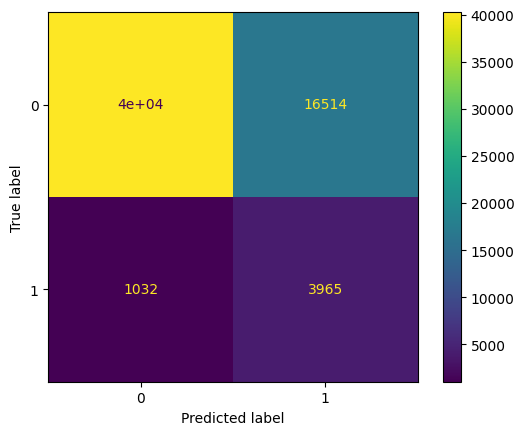

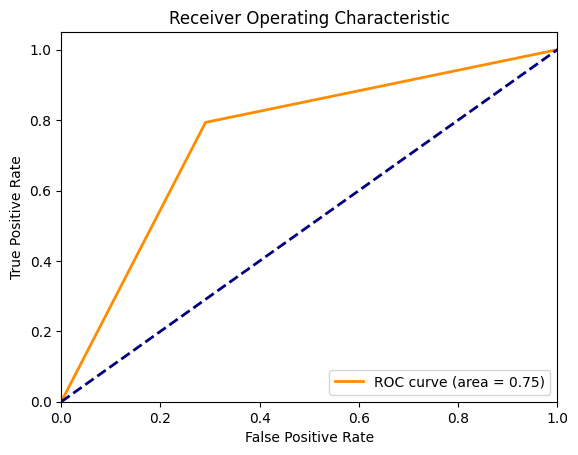

In [28]:
from sklearn.metrics import *
# Print the classification report
report = classification_report(y_test, y_pred)
print(report)

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

# Plot the confusion matrix
disp.plot()
plt.show()


# Compute ROC curve and ROC area
fpr_optimized, tpr_optimized, _ = roc_curve(y_test, y_pred)
roc_auc_optimized = auc(fpr_optimized, tpr_optimized)

# Plot ROC curve
plt.figure()
plt.plot(fpr_optimized, tpr_optimized, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_optimized)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

* Matriz de Confusión
    La matriz de confusión muestra la siguiente información:

    * Verdaderos positivos para la clase 0: 40,000 (aproximadamente) casos fueron correctamente clasificados como clase 0.
    * Falsos positivos para la clase 0: 16,514 casos fueron incorrectamente clasificados como clase 0 cuando en realidad son clase 1.
    * Falsos negativos para la clase 0: 1,032 casos fueron incorrectamente clasificados como clase 1 cuando en realidad son clase 0.
    * Verdaderos positivos para la clase 1: 3,965 casos fueron correctamente clasificados como clase 1.
    
    Esto indica que el clasificador tiene una tasa alta de falsos positivos al predecir la clase 0.

* Curva ROC
    La Curva Característica Operativa del Receptor (ROC) muestra la relación entre la Tasa de Verdaderos Positivos (TPR, o sensibilidad) y la Tasa de Falsos Positivos (FPR, o 1-especificidad) a diferentes umbrales. Un área bajo la curva ROC (AUC) de 0.75 indica un buen rendimiento del clasificador. Cuanto más se acerque el AUC a 1, mejor será el modelo para distinguir entre las dos clases.

* Informe de Clasificación

El reporte de clasificación proporciona las siguientes métricas:

* Precisión para la clase 0: El 98% del tiempo que el modelo predijo la clase 0, estaba en lo correcto.
* Recall para la clase 0: El modelo capturó correctamente el 71% de todas las instancias reales de la clase 0.
* F1-Score para la clase 0: Una medida combinada de precisión y recall que da un puntaje de 0.82, que es bastante alto y sugiere un buen equilibrio entre precisión y recall para la clase 0.

* Precisión para la clase 1: Sólo el 19% del tiempo que el modelo predijo la clase 1, estaba en lo correcto.
* Recall para la clase 1: El modelo capturó correctamente el 79% de todas las instancias reales de la clase 1.
* F1-Score para la clase 1: El puntaje F1 es 0.31, lo que sugiere que mientras el modelo es relativamente bueno identificando la clase 1 entre todos los casos positivos reales, no es muy preciso en sus predicciones para esta clase.

La precisión global (accuracy) del modelo es del 72%, lo que indica que el modelo predijo la clase correcta aproximadamente 3 de cada 4 veces.

El promedio macro de precisión, recall y F1-score es de 0.58, 0.75 y 0.57 respectivamente, lo que sugiere un desempeño bastante equilibrado para las dos clases en términos de recall, pero una gran variación en la precisión y el F1-score, lo que probablemente se debe al desequilibrio de las clases.

El promedio ponderado tiene en cuenta el soporte de cada clase y proporciona una imagen más representativa del desempeño global del modelo, con valores de precisión, recall y F1-score ligeramente más altos que el promedio macro.

identificar correctamente los casos negativos de la clase 0, pero lucha con la precisión para la clase 1, lo que resulta en una cantidad significativa de falsos positivos. Esto puede ser un resultado directo del desequilibrio de clases en tus datos. A pesar de la alta sensibilidad para la clase 1, el modelo necesita mejorar en precisión para ser más efectivo en la práctica, especialmente si los costos de los falsos positivos son altos. El buen AUC sugiere que el modelo tiene un buen rendimiento en la clasificación de las clases en general, pero podría necesitar un ajuste del umbral de decisión para equilibrar mejor las métricas de rendimiento para ambas clases.

Debido a estos resultados vamos a:

* Ajuste de Hiperparámetros de XGBoost: vamos a realizar una búsqueda exhaustiva de hiperparámetros (como GridSearchCV o RandomizedSearchCV) para encontrar la mejor configuración del modelo XGBoost. Parámetros como max_depth, min_child_weight, gamma, subsample, y colsample_bytree pueden tener un gran impacto en el rendimiento.
* Ajuste de Umbral: Modificar el umbral de clasificación para la clase positiva. Por defecto, este umbral es 0.5, pero puedes aumentarlo o disminuirlo para mejorar la precisión o el recall, según lo que sea más importante para tu aplicación específica.

### RandomForest

Ajuste de Hiperparámetro: Si aún no lo has hecho, realizar una búsqueda exhaustiva de hiperparámetros (como GridSearchCV o RandomizedSearchCV) para encontrar la mejor configuración del modelo

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     56774
         1.0       0.43      0.02      0.04      4997

    accuracy                           0.92     61771
   macro avg       0.67      0.51      0.50     61771
weighted avg       0.88      0.92      0.88     61771



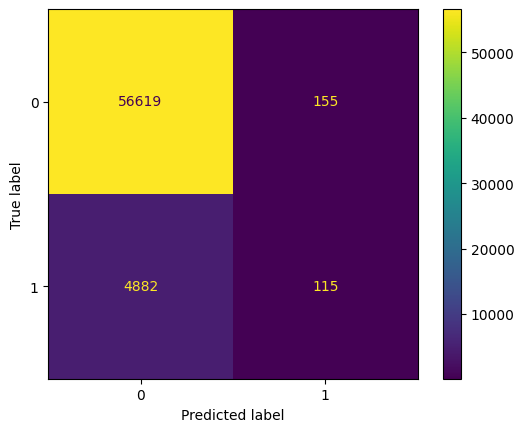

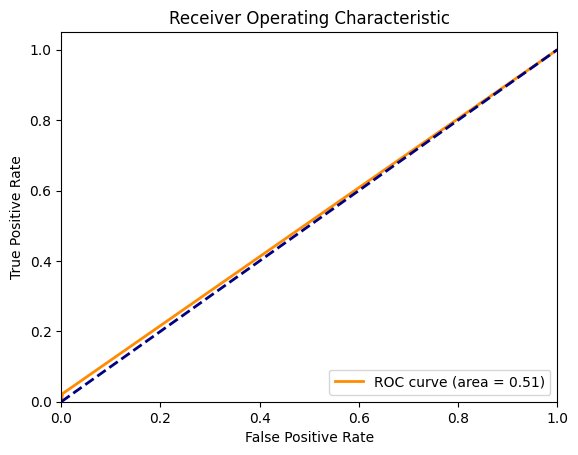

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Asumiendo que X_oe e y_oe son tus datos de características y etiquetas ya preparados:
X_train, X_test, y_train, y_test = train_test_split(X_oe, y_oe, test_size=0.2, random_state=42)

# Crear el modelo Random Forest
random_forest_model = RandomForestClassifier(n_estimators=100,  # Número de árboles
                                             random_state=42,   # Semilla para la reproducibilidad
                                             class_weight='balanced')  # Para manejar clases desbalanceadas

# Entrenar el modelo
random_forest_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_rf = random_forest_model.predict(X_test)

# Calcular métricas de rendimiento
report_rf = classification_report(y_test, y_pred_rf)
print(report_rf)

# Matriz de confusión
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)

# Mostrar la matriz de confusión
disp_rf.plot()
plt.show()

# Compute ROC curve and ROC area
fpr_optimized, tpr_optimized, _ = roc_curve(y_test, y_pred_rf)
roc_auc_optimized = auc(fpr_optimized, tpr_optimized)

# Plot ROC curve
plt.figure()
plt.plot(fpr_optimized, tpr_optimized, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_optimized)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Logistic Regression

### Support Vector Machine

### Redes Neuronales

### Naive Bayes

### K-Nearest Neighbors